Hello, Index here!!

0. Configuration of environment : Gym--FrozenLake Slippery or NotSlippery--
1. Policy Iteration
2. Value Iteration
3. Experiment < discount_factor and theta>

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

0. Configuration of environment : Gym--FrozenLake Slippery or NotSlippery

In [2]:
gym.envs.register(
id="FrozenLakeNotSlippery-v0",
entry_point="gym.envs.toy_text:FrozenLakeEnv",
kwargs={'map_name':'4x4', "is_slippery":False},
max_episode_steps=100,)
gym.envs.register(
id="FrozenLakeSlippery-v0",
entry_point="gym.envs.toy_text:FrozenLakeEnv",
kwargs={'map_name':'4x4', "is_slippery":True},
max_episode_steps=100,)

1&2. Policy Iteration & Value Iteration

In [3]:
class DP:
    def __init__(self,iteration=100, theta= 0.01, discount_factor=1, dynamic="stochastic", mode="policy_iteration"):
        # ----------------------------------parameter-----------------------------#
        self.iteration = iteration
        self.theta = theta
        self.discount_factor = discount_factor
        self.dynamic = dynamic
        self.mode = mode
        
        self.state_size = 16
        self.action_size = 4
        
        
        mode_args = ['policy_iteration', 'value_iteration', 'GPI']
        if self.mode not in mode_args:
            raise RuntimeError('mode may be wrong. you should choose one of them,"policy_iteration", "value_iteration" and "GPI"')
        # -----------------------------------env-----------------------------------#
        
        if self.dynamic == "stochastic":
            self.env = gym.make("FrozenLakeSlippery-v0")
        elif self.dynamic == "deterministic":
            self.env = gym.make("FrozenLakeNotSlippery-v0")
        else:
            raise RuntimeError("dynamic may be wrong!!")
        
        # -------------------------------value fucntion-----------------------------#
        
        self.state_value = {}
        self.action_value = {}
        
    
    def get_action(self,state):
        q_value = self.action_value[state]
        maximum = np.max(q_value)
        action = np.where(q_value==maximum)[0]
        prob_a = 1/len(action)
        
        return action, prob_a
        
        
    def initialize(self):
        for i in range(self.state_size):
            self.state_value[i] = 0
            self.action_value[i] = np.zeros(self.action_size)
        
    def reset_state(self):
        for i in range(self.state_size):
            self.state_value[i] = 0
    def print_status(self):
        V = np.zeros(self.state_size)
        for i in range(self.state_size):
            V[i] = self.state_value[i]
        
        sns.heatmap(V.reshape(4,4), annot=True,cbar=False)
    def policy_evalution(self):
        while(1):
            prev_state = self.state_value.copy()
            delta = 0
            for state in range(self.state_size):
                prime_sv = 0
                action, prob_a = self.get_action(state)
                for act in action:
                    po_obs = self.env.P[state][act] # ([], [], ...)
                    for ob in po_obs:
                        prob, next_state, reward, done = ob
                        if done:
                            prime_sv += prob *prob_a * reward
                        else:
                            prime_sv += prob *prob_a * (reward + self.discount_factor * prev_state[next_state])
                
                self.state_value[state] = prime_sv
                delta_temp = abs(prime_sv - prev_state[state])
                if (delta_temp > delta):
                    delta = delta_temp
            if ( delta < self.theta)or(self.mode == 'value_iteration'):
                break
    def policy_update(self):
        for state in range(self.state_size):
            for action in range(self.action_size):
                po_obs = self.env.P[state][action]
                q_value = 0
                for ob in po_obs:
                    prob, next_state, reward, done = ob
                    if done:
                        q_value += prob * reward
                    else:
                        q_value += prob * (reward + self.discount_factor * self.state_value[next_state])
                
                self.action_value[state][action] = q_value
            
        
    
    def run(self):
        self.initialize()
        for i in range(self.iteration):
            self.policy_evalution()
            self.policy_update()
                
            if (self.mode =="policy_iteration") and (i < (self.iteration-1)):
                self.reset_state()
        
        self.print_status()

arguments

    1.iteration: default:100
    
    2.theta : the precision of evluation, default:0.01
    
    3.discount_factor: default:1
    
    4.dynamic:"deterministic" or "stochastic", default:"stochastic"
    
    5.mode:"policy_iteration" or "value_iteration", default:"policy_iteration"
    

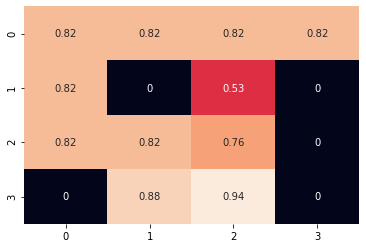

In [14]:
policy_iteration = DP(iteration=50,theta=0.0001)
policy_iteration.run()

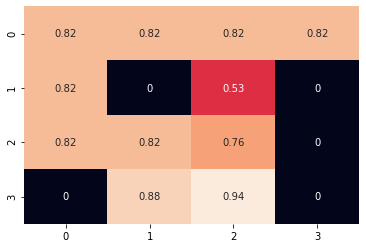

In [15]:
value_iteration = DP(iteration=1000,mode="value_iteration")
value_iteration.run()

both alogorithms lead to the same state value function.

3.Experiment

1. Deterministic vs Stochastic
    - all states except terminal states have the same value 1 in the deterministic environment. if policy is optimal, regardless of the state, they will reach the goal. and then, they get goal reward. but in the stochastic environment, even though policy is optimal, it can not reach the goal

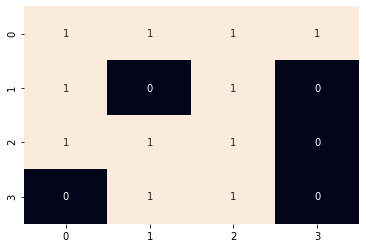

In [78]:
det_case = DP(dynamic="deterministic")
det_case.run()

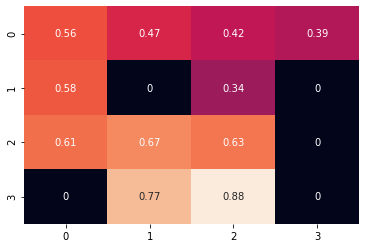

In [79]:
det_case = DP(dynamic="stochastic")
det_case.run()